I moved the player data logic into a module, let's make sure it's still working. I also changed the victory point margin calculation to be how many points above the average of all players a user scored. The meaning is a bit less intuitive but I think it will have better statistical properties since there won't be the cluster around 0.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
from terra_mystica_models.features import parse_interim, player_data

In [3]:
pd.options.display.max_rows = 999

In [4]:
all_games_df = parse_interim.interim_full_pipe()

In [5]:
players = player_data.TerraMysticaPlayers(all_games_df)

Take a look at the player stats we compute

In [6]:
players.player_df

,number_of_games,mean_vp,mean_vp_margin
user,,,
-sjk-,127,133.897638,4.197507
00,144,108.784722,-11.327662
104ki,123,134.268293,4.979675
12AngryDwarfs,191,109.586387,-5.475218
19sebbe90,63,130.428571,8.098413
...,...,...,...
zoeshao,59,121.203390,1.322316
zopfmeister,97,124.350515,6.769244
zrap,163,92.024540,-17.284254


Quick check, the game dataframe should have been modified to replace anyone not in the above dataframe with "Other Terra Mystica User"

In [7]:
players.game_df["player_1_user"]

pbc3        Other Terra Mystica User
10          Other Terra Mystica User
21          Other Terra Mystica User
5           Other Terra Mystica User
8           Other Terra Mystica User
                      ...           
ZGame301                ZeroCool2017
ZGame302                    Weltmann
ZGame303                    Weltmann
ZGame304                       Snitz
ZGame305                    Fironics
Name: player_1_user, Length: 144750, dtype: object

### VP margin distribution

I changed the logic for this to be deviation from mean rather than deviation from minimum, let's see what it looks like

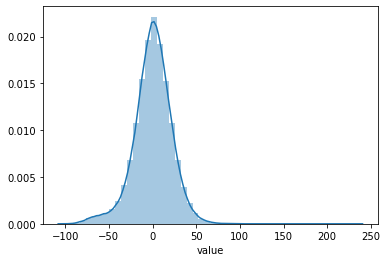

In [8]:
vp_margin_cols = [col for col in all_games_df.columns if col.endswith("vp_margin")]
all_vp_margins = (
    all_games_df
    .reset_index()
    .melt(value_vars=vp_margin_cols)
    .dropna()
    ["value"]
)
sns.distplot(all_vp_margins);

In [9]:
all_vp_margins.describe()

count    5.174130e+05
mean     2.900326e-17
std      2.183546e+01
min     -1.036667e+02
25%     -1.200000e+01
50%      1.000000e+00
75%      1.350000e+01
max      2.360000e+02
Name: value, dtype: float64

OK, that looks like it might get me some better fits.